In [1]:
#Importing required libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import numpy as np

In [17]:
# loading a file just to see how I can do it. then I will loop it trough it 
df = pd.read_csv('/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/1over5/mh/REvoSim_log_3.txt', sep=',', header=0, usecols=[0, 6, 8], names=['Iteration_number', 'Species_ID', 'Parent_species'])
# each line in this df is a species in that iteration so if i have thwo species at iteration 50 i will have two rows for that iteration number

In [18]:
# Extract the parent species and keep only those
parents = list(np.unique(df['Parent_species'].tolist()))
# Use the parent list to filter all of the other species in the dataset and remove them
no_fluff =  df[df['Species_ID'].isin(parents)] 
# count how many species are present at each iteration after removing the fluff
sc_no_fluff = no_fluff['Iteration_number'].value_counts().reset_index()
sc_no_fluff.columns = ['Iteration_number', 'Species_count']

In [20]:
# Define the folders containing the csv files
# List of folder paths
folder_paths = ['/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/1over5/mh',
    '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/1over10/mh',
    '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/1over25/mh',
    '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/1over40/mh',
    '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/1over50/mh',
    '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/1over60/mh',
    '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/1over70/mh',
    '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/1over80/mh',
    '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/1over90/mh',
    '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/1over100/mh',
    '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/1over110/mh',
    '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/1over200/mh',]

# Define folder labels
folder_labels = ['w=5', 'w=10', 'w=25', 'w=40', 'w=50', 'w=60','w=70','w=80', 'w=90', 'w=100', 'w=110', 'w=200']


In [2]:
#freq that are on blue as sin, red as 0 and green on 127, 64 BITS GENOME
folder_paths = ['/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/3rd batches - Blue and Green/64-bits-genome/5w_64_bits',
                '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/3rd batches - Blue and Green/64-bits-genome/10w_64_bits',
                '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/3rd batches - Blue and Green/64-bits-genome/25w_64_bits',
                '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/3rd batches - Blue and Green/64-bits-genome/50w_64_bits',
                '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/3rd batches - Blue and Green/64-bits-genome/100w_64_bits',]
# Define folder labels
folder_labels = [ 5, 10, 25, 50, 100]

The number of simulations (N) for this environment are:  100


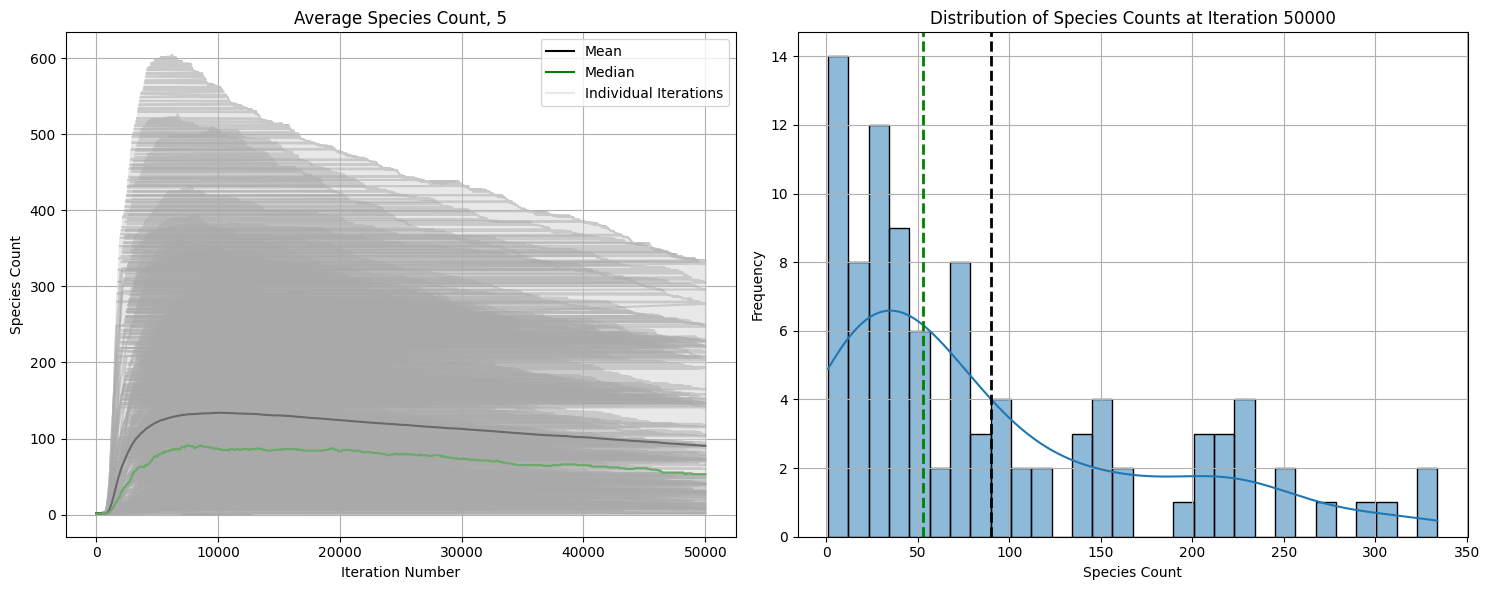

The number of simulations (N) for this environment are:  100


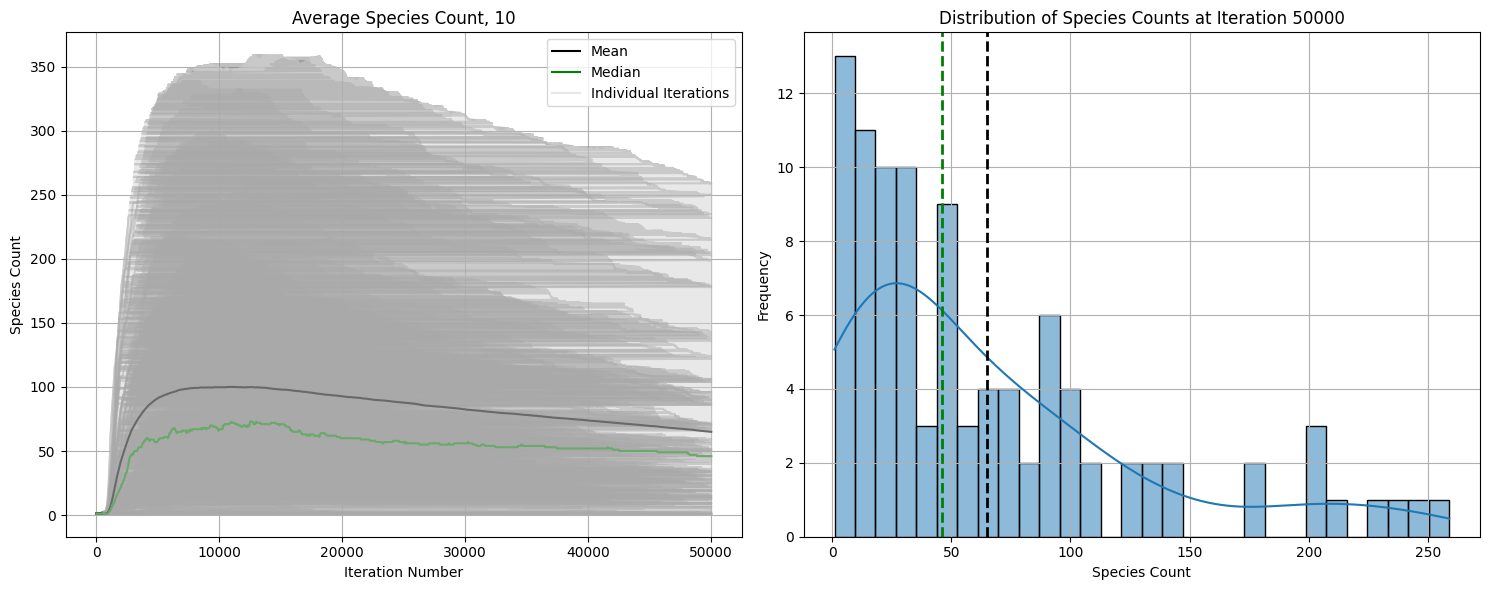

The number of simulations (N) for this environment are:  100


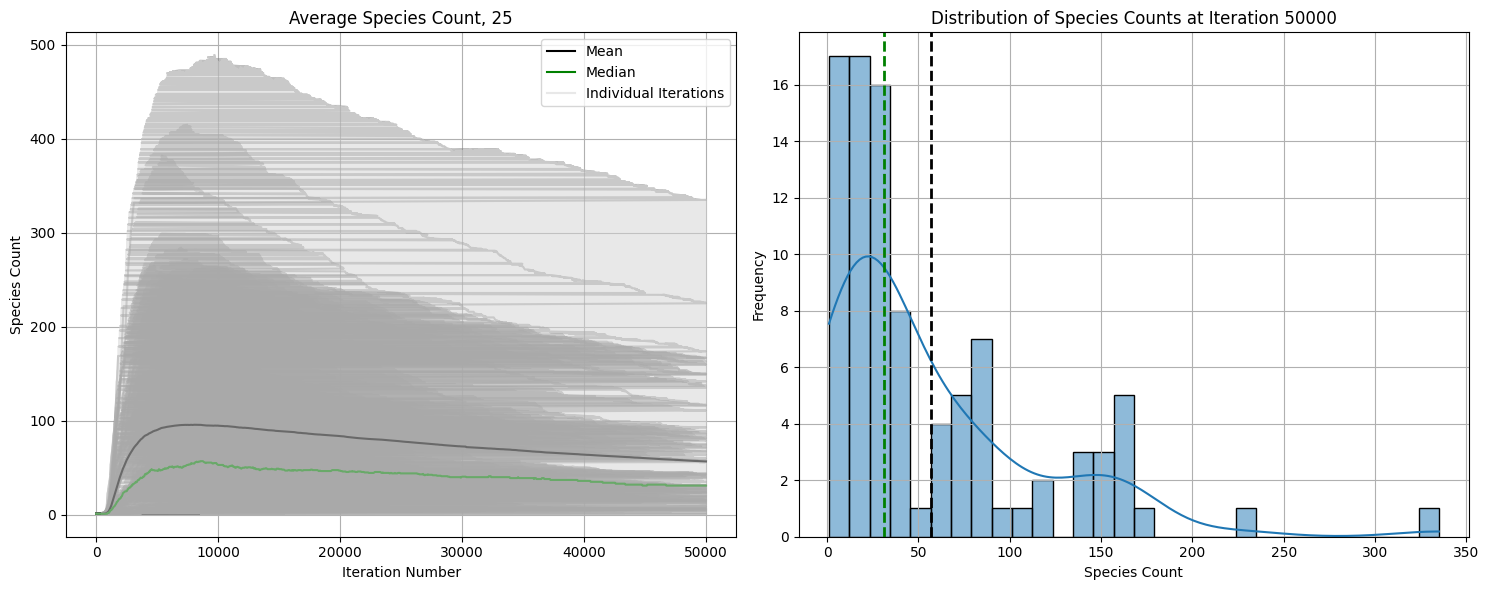

The number of simulations (N) for this environment are:  100


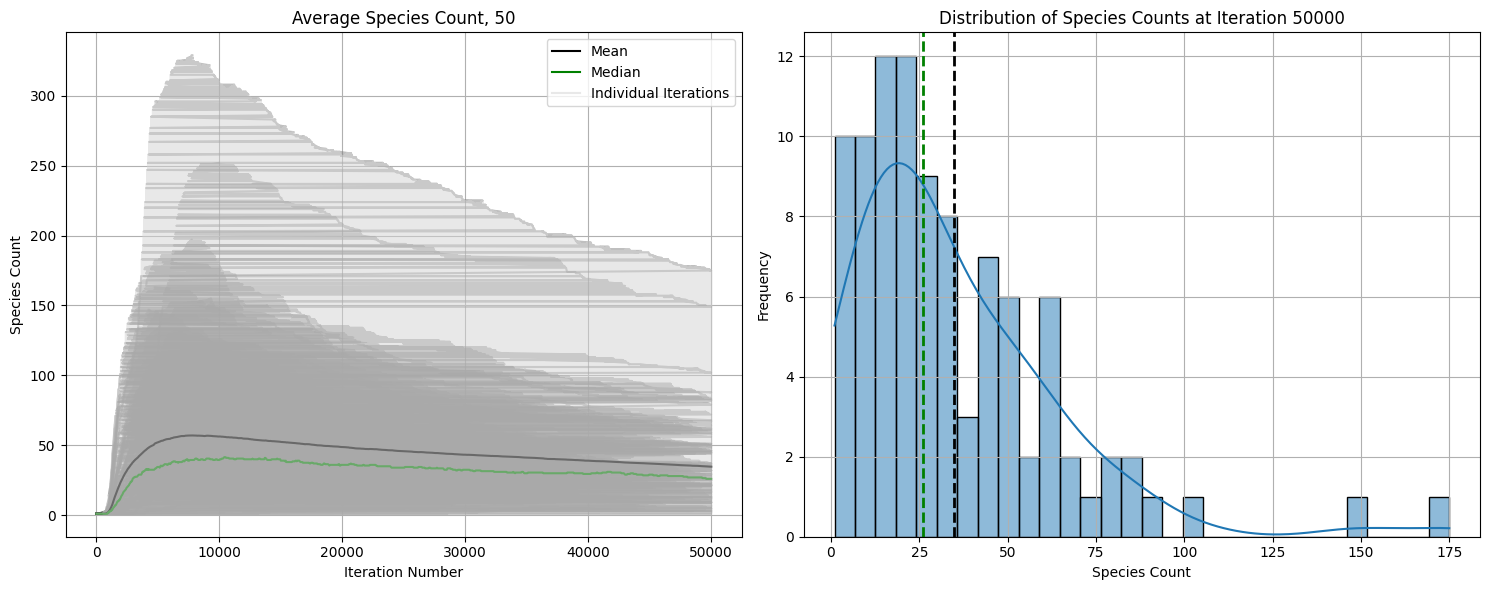

The number of simulations (N) for this environment are:  100


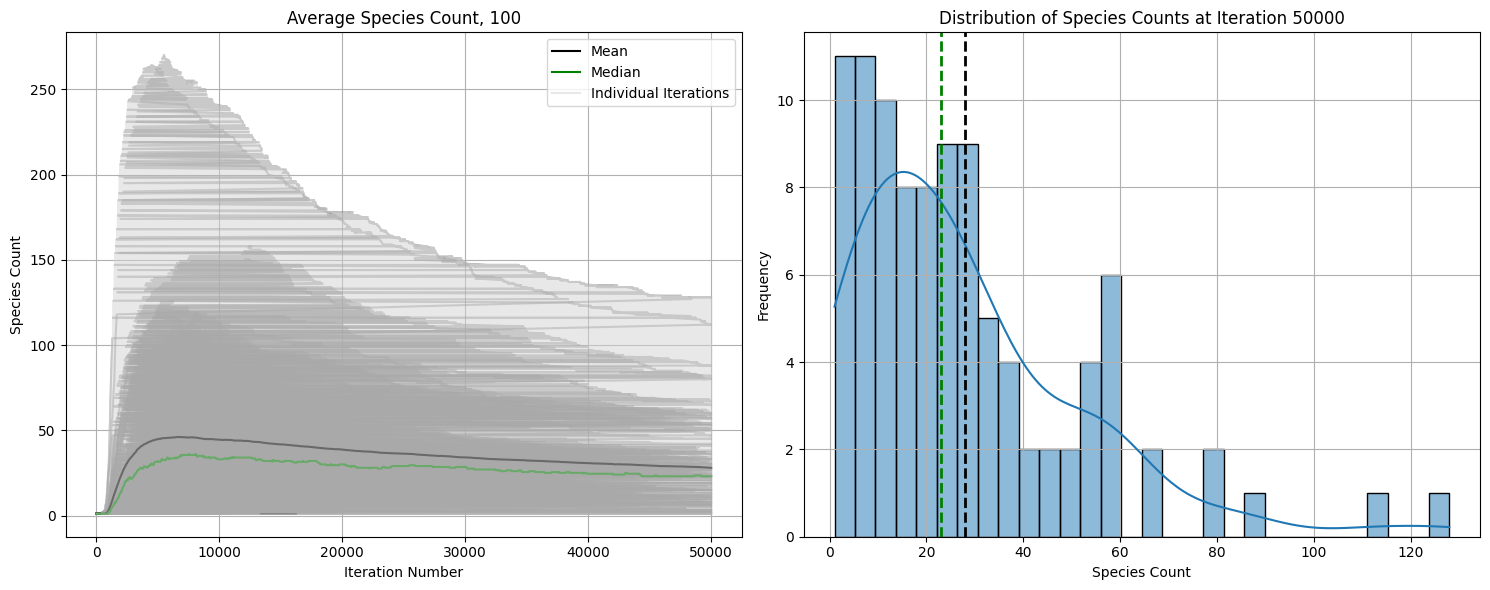

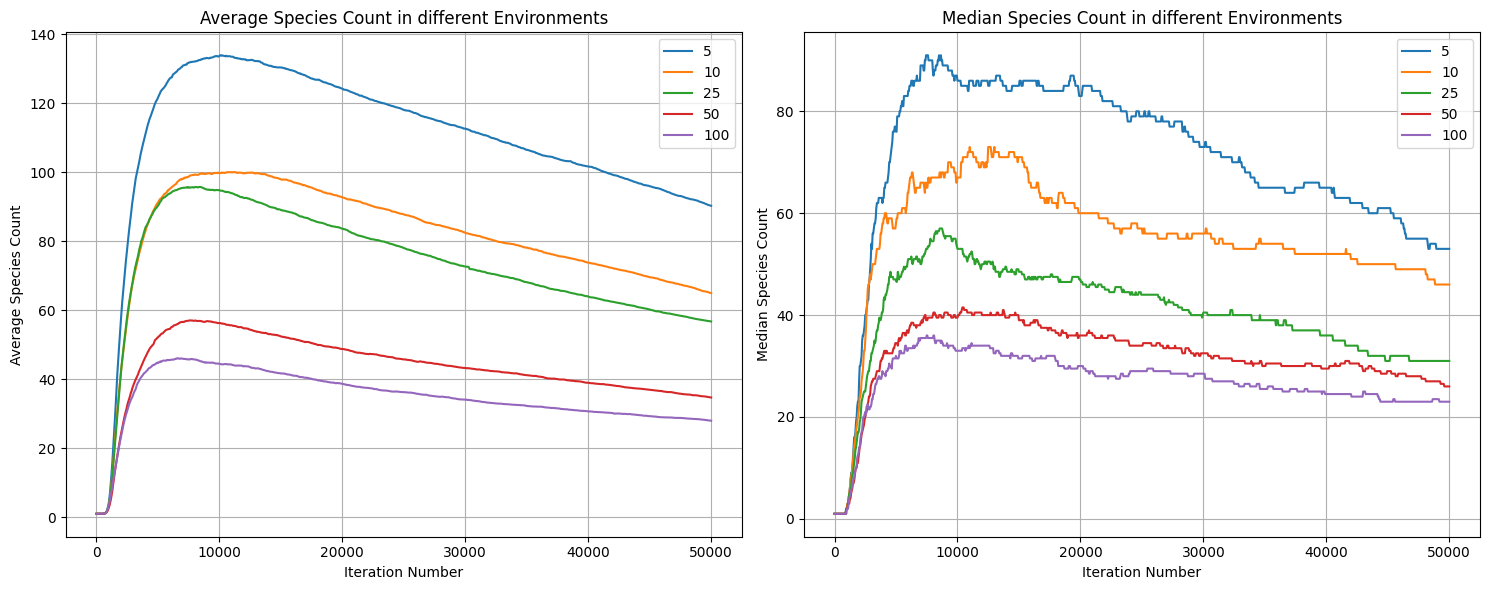

In [3]:
# Create a list to store average DataFrames for each folder
average_dataframes = []
median_dataframes = []
distribution_counts = []

# Loop through the folders
for i, folder_path in enumerate(folder_paths):
 
    # create a list to store individual DataFrames
    dataframes = []

    #Loop through each file in the folder and read it into a DataFrame
    for filename in os.listdir(folder_path):
        match = re.match(r'REvoSim_log_(\d+).txt', filename)
        if match:
            file_path = os.path.join(folder_path, filename)
            df = pd.read_csv(file_path, sep=',', header=0, usecols=[0, 6, 8], names=['Iteration_number', 'Species_ID', 'Parent_species'])
            # Extract the parent species and keep only those
            parents = list(np.unique(df['Parent_species'].tolist()))
            # Use the parent list to filter all of the other species in the dataset and remove them
            no_fluff =  df[df['Species_ID'].isin(parents)] 
            # count how many species are present at each iteration after removing the fluff
            sc_no_fluff = no_fluff['Iteration_number'].value_counts().reset_index()
            sc_no_fluff.columns = ['Iteration_number', 'Species_count']
            dataframes.append(sc_no_fluff)
    
    # Concatenate all DataFrames into one
    all_data = pd.concat(dataframes, ignore_index=True)
    #Sort the DataFrame by 'Iteration_number'
    all_data = all_data.sort_values(by='Iteration_number')

    # Group by 'Iteration_number' and calculate the average 'Species_count'
    average_data = all_data.groupby('Iteration_number')['Species_count'].mean().reset_index()
    median_data = all_data.groupby('Iteration_number')['Species_count'].median().reset_index()

    # Append the average DataFrame to the list
    average_dataframes.append(average_data)
    median_dataframes.append(median_data)
    distribution = all_data.loc[all_data['Iteration_number'] == 49999, 'Species_count'].tolist()
    
    # printing the sample size
    print('The number of simulations (N) for this environment are: ',len(dataframes))
    
    # Plot the data
    # I want two plots for each environment, one with the distribution at equilibrium, and one with the SP over time
    plt.figure(figsize=(15, 6))
    
    plt.subplot(1, 2, 1)
    for df in dataframes:
        plt.plot(df['Iteration_number'], df['Species_count'], color='gray', alpha=0.5)
    plt.plot(average_data['Iteration_number'], average_data['Species_count'], color='black', label=f'Mean')
    plt.plot(median_data['Iteration_number'], median_data['Species_count'], color='green', label=f'Median')
    plt.plot(all_data['Iteration_number'], all_data['Species_count'], color='lightgray', alpha=0.5, label='Individual Iterations')
    plt.title(f'Average Species Count, {folder_labels[i]}')
    plt.xlabel('Iteration Number')
    plt.ylabel('Species Count')
    #plt.ylim(0, 2500)
    plt.legend()
    plt.grid(True)

    # distribution of values at equilibrium
    plt.subplot(1, 2, 2)
    sns.histplot(data=distribution, kde=True, bins = 30)
    # plt.hist(distribution, bins=30, alpha=0.7)
    plt.title('Distribution of Species Counts at Iteration 50000')
    plt.axvline(np.mean(distribution), color='black', linestyle='dashed', linewidth=2, label='Mean')
    plt.axvline(np.median(distribution), color='green', linestyle='dashed', linewidth=2, label='Median')
    plt.xlabel('Species Count')
    plt.ylabel('Frequency')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    



# ploting the average curves for all folders
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
for i, average_data in enumerate(average_dataframes):
    plt.plot(average_data['Iteration_number'], average_data['Species_count'], label=f'{folder_labels[i]}')
plt.title('Average Species Count in different Environments')
plt.xlabel('Iteration Number')
plt.ylabel('Average Species Count')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
for i, median_data in enumerate(median_dataframes):
    plt.plot(median_data['Iteration_number'], median_data['Species_count'], label=f'{folder_labels[i]}')
plt.title('Median Species Count in different Environments')
plt.xlabel('Iteration Number')
plt.ylabel('Median Species Count')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


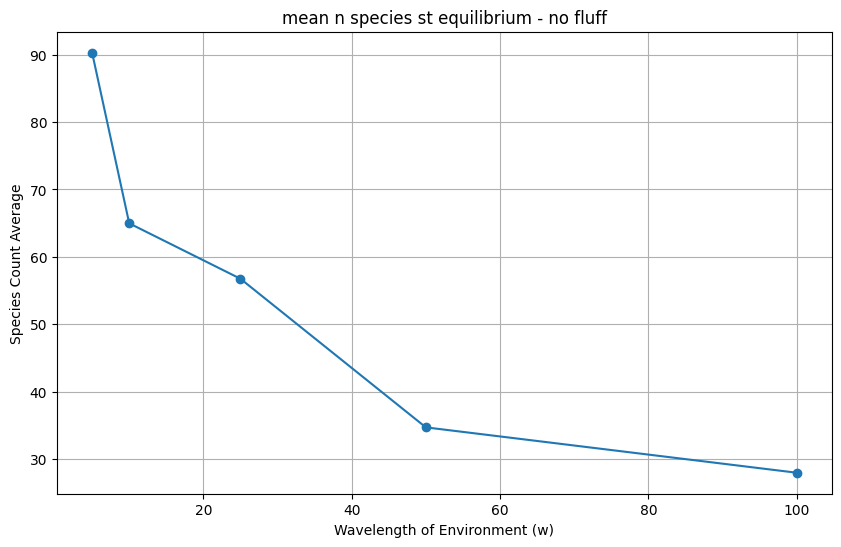

In [9]:
### Now I'm creating a graph that will show the wavelength on the xaxis and the average/median SP that we had at equilibrium 

# Define numerical values corresponding to each w
w_values = [5, 10, 25, 50, 100]
# Create a list to store species counts at each iteration number
iteration_numbers = [49999]
species_counts_at_iterations_mean = []
species_counts_at_iterations_median = []

# Loop through the iteration numbers
for iteration_number in iteration_numbers:
    # Use different variable names within the loop
    species_counts_at_iteration_mean_temp = []
    species_counts_at_iteration_median_temp = []

    # Loop through the folders
    for average_data in average_dataframes:
        row_at_iteration = average_data[average_data['Iteration_number'] == iteration_number]
        if not row_at_iteration.empty:
            species_counts_at_iteration_mean_temp.append(row_at_iteration['Species_count'].values[0])
        else:
            species_counts_at_iteration_mean_temp.append(None)

    # Append the species counts at the current iteration number to the main list
    species_counts_at_iterations_mean.append(species_counts_at_iteration_mean_temp)
    
    # Loop through the folders
    for median_data in median_dataframes:
        row_at_iteration = median_data[median_data['Iteration_number'] == iteration_number]
        if not row_at_iteration.empty:
            species_counts_at_iteration_median_temp.append(row_at_iteration['Species_count'].values[0])
        else:
            species_counts_at_iteration_median_temp.append(None)

    # Append the species counts at the current iteration number to the main list
    species_counts_at_iterations_median.append(species_counts_at_iteration_median_temp)

# Plot the data
plt.figure(figsize=(10, 6))

# subplot_mean = plt.subplot(1, 2, 1)
for i, iteration_number in enumerate(iteration_numbers):
    plt.plot(w_values, species_counts_at_iterations_mean[i], marker='o', label=f'Iteration {iteration_number}')
# # Highlight specific points in red
# highlight_w_values = [40, 60, 70, 80, 90, 110]
# for i, iteration_number in enumerate(iteration_numbers):
#     highlighted_indices = [w_values.index(w) for w in highlight_w_values]
#     plt.scatter(
#         [w_values[idx] for idx in highlighted_indices],
#         [species_counts_at_iterations_mean[i][idx] for idx in highlighted_indices],
#         color='red',
#         zorder=2
#     )
plt.title('mean n species st equilibrium - no fluff')
plt.xlabel('Wavelength of Environment (w)')
plt.ylabel('Species Count Average')
plt.grid(True)

# plt.subplot(1, 2, 2)
# subplot_median = plt.subplot(1, 2, 2)
# for i, iteration_number in enumerate(iteration_numbers):
#     # Exclude specific values from w_values and corresponding species_counts
#     filtered_w_values = [w for w in w_values if w not in highlight_w_values]
#     filtered_species_counts = [count for w, count in zip(w_values, species_counts_at_iterations_mean[i]) if w not in highlight_w_values]
    
#     plt.plot(filtered_w_values, filtered_species_counts, marker='o', label=f'Iteration {iteration_number}')
# plt.title('torioidal W only - no fluff')
# plt.xlabel('Wavelength of Environment (w)')
# plt.ylabel('Species Count Mean')
# plt.grid(True)
# plt.show()


